<ipython-input-11-e5db535f99a1>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,medium,'r',linewidth=1.5,label='medium',color='green')


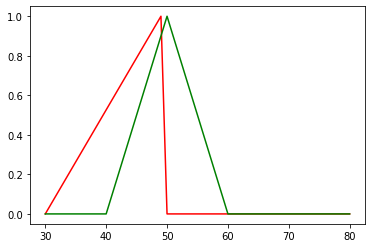

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x= np.arange(30,81,1)
slow = fuzz.trimf(x,[30,49,50])
medium=fuzz.trimf(x,[40,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'r',linewidth=1.5,label='medium',color='green')


<ipython-input-16-b350748c427c>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,slow,'r',linewidth=1.5,label='slow',color='red')
<ipython-input-16-b350748c427c>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,medium,'r',linewidth=1.5,label='medium',color='green')


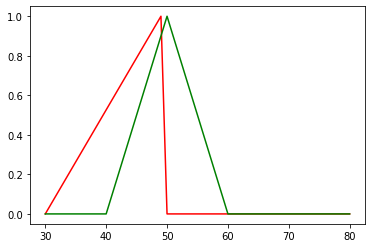

In [ ]:

x= np.arange(30,81,1)
slow = fuzz.trapmf(x,[30,49,49,50])
medium=fuzz.trapmf(x,[40,50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow',color='red')
plt.plot(x,medium,'r',linewidth=1.5,label='medium',color='green')

<ipython-input-24-1251cd918bff>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,slow,'r',linewidth=1.5,label='slow',color='red')
<ipython-input-24-1251cd918bff>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,medium,'r',linewidth=1.5,label='medium',color='green')


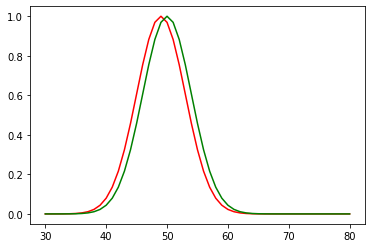

In [ ]:
x= np.arange(30,81,1)
slow = fuzz.gaussmf(x,49,4)
medium=fuzz.gaussmf(x,50,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow',color='red')
plt.plot(x,medium,'r',linewidth=1.5,label='medium',color='green')

19.70120898100173


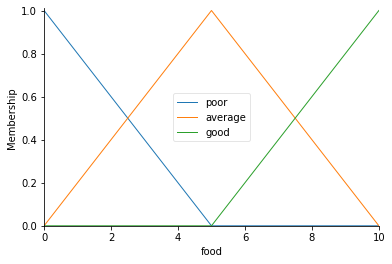

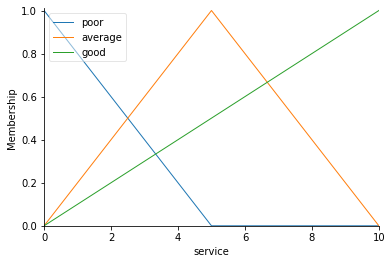

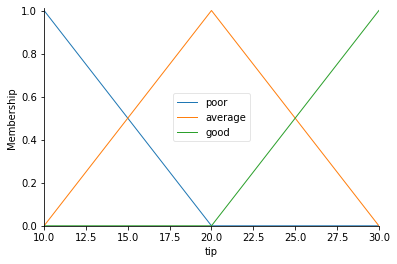

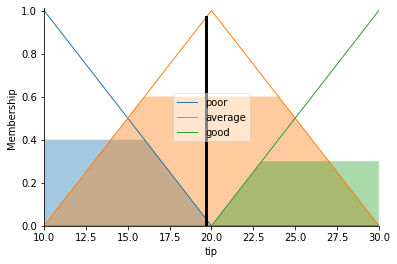

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
from skfuzzy.control.controlsystem import ControlSystem 
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip= ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[0,10,10])
tip['poor']=fuzz.trimf(tip.universe,[10,10,20])
tip['average']=fuzz.trimf(tip.universe,[10,20,30])
tip['good']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
rule1=ctrl.Rule(food['poor']&service['poor'],tip['poor'])
rule2=ctrl.Rule(food['poor']&service['average'],tip['poor'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4=ctrl.Rule(food['average']&service['poor'],tip['poor'])
rule5=ctrl.Rule(food['average']&service['average'],tip['average'])
rule6=ctrl.Rule(food['average']&service['good'],tip['good'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['average'],tip['good'])
rule9=ctrl.Rule(food['good']&service['good'],tip['good'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=5
tipping.input['service']=3
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

26.757983193277305


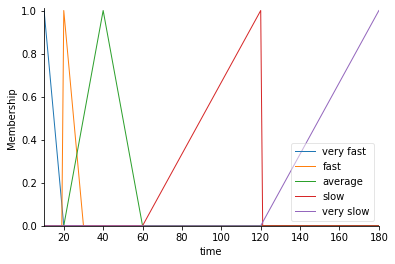

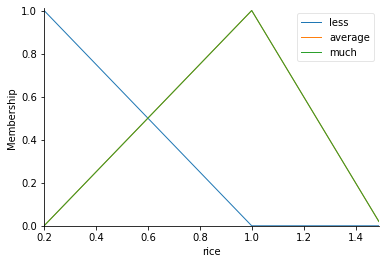

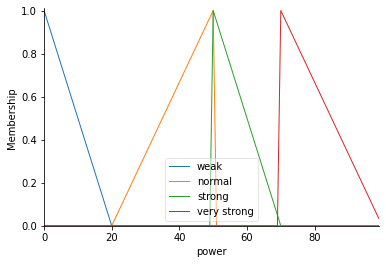

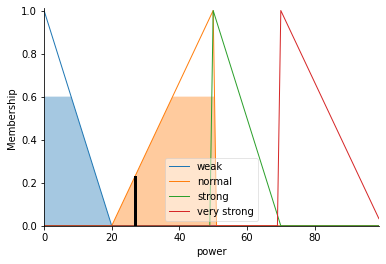

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
from skfuzzy.control.controlsystem import ControlSystem 
time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(0.2,1.5,0.01),'rice')
power= ctrl.Consequent(np.arange(0,100,1),'power')
time['very fast']=fuzz.trimf(time.universe,[10,10,20])
time['fast']=fuzz.trimf(time.universe,[20,20,30])
time['average']=fuzz.trimf(time.universe,[20,40,60])
time['slow']=fuzz.trimf(time.universe,[60,120,120])
time['very slow']=fuzz.trimf(time.universe,[120,180,180])
rice['less']=fuzz.trimf(rice.universe,[0.2,0.2,1])
rice['average']=fuzz.trimf(rice.universe,[0.2,1,1.5])
rice['much']=fuzz.trimf(rice.universe,[0.2,1,1.5])
power['weak']=fuzz.trimf(power.universe,[0,0,20])
power['normal']=fuzz.trimf(power.universe,[20,50,50])
power['strong']=fuzz.trimf(power.universe,[50,50,70])
power['very strong']=fuzz.trimf(power.universe,[70,70,100])
time.view()
rice.view()
power.view()

rule1=ctrl.Rule(time['very fast']&rice['less'],power['normal'])
rule2=ctrl.Rule(time['very fast']&rice['average'],power['strong'])
rule3=ctrl.Rule(time['very fast']&rice['much'],power['very strong'])
rule4=ctrl.Rule(time['fast']&rice['less'],power['weak'])
rule5=ctrl.Rule(time['fast']&rice['average'],power['normal'])
rule6=ctrl.Rule(time['fast']&rice['much'],power['strong'])
rule7=ctrl.Rule(time['average']&rice['less'],power['weak'])
rule8=ctrl.Rule(time['average']&rice['average'],power['normal'])
rule9=ctrl.Rule(time['average']&rice['much'],power['strong'])
rule10=ctrl.Rule(time['slow']&rice['less'],power['weak'])
rule11=ctrl.Rule(time['slow']&rice['average'],power['weak'])
rule12=ctrl.Rule(time['slow']&rice['much'],power['normal'])
rule13=ctrl.Rule(time['very slow']&rice['less'],power['weak'])
rule14=ctrl.Rule(time['very slow']&rice['average'],power['weak'])
rule15=ctrl.Rule(time['very slow']&rice['much'],power['normal'])

power_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
powering= ctrl.ControlSystemSimulation(power_ctrl)
powering.input['time']=120
powering.input['rice']=1.2
powering.compute()
print(powering.output['power'])
power.view(sim=powering)

In [ ]:
%pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6a88a8626ebdc4e3f8b2d2b1b470b47eccc875bd528bfe44b5cb4a2a581cd600
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
